In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import classification_report                 # 评价报告

In [2]:
data = loadmat('D:/Google_Download/andrew_ml_ex33507/ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
type(data['X']),data['X'].shape,data['y'].shape

(numpy.ndarray, (5000, 400), (5000, 1))

In [4]:
# 随机采集100个数据
# 产生100个5000以内的数
sample_idx = np.random.choice(np.arange(data['X'].shape[0]),100)
sample_images = data['X'][sample_idx,:]
sample_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

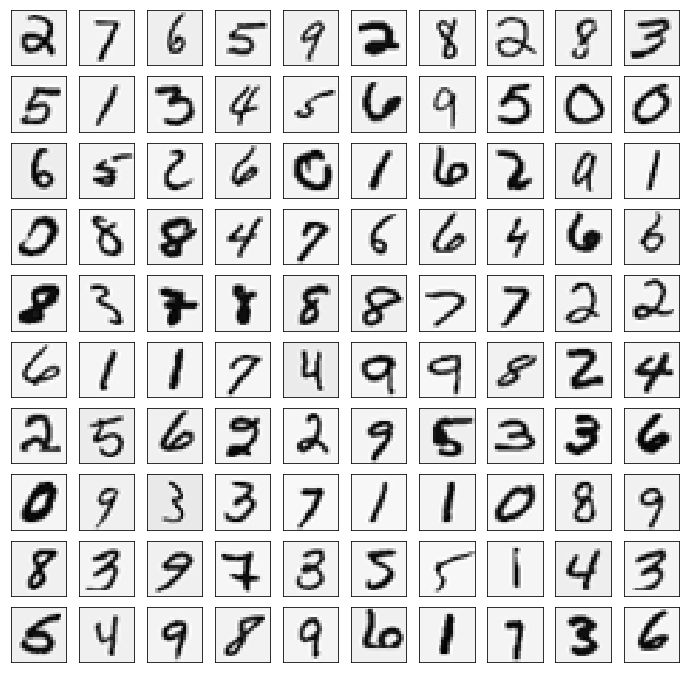

In [5]:
# 将随机采集的数据展示出来
# subplots是画一张画布，并将该画布切割用于画多幅图，nrows表示有几行，ncols表示有几列，sharex表示这些图的x轴坐标是否相同
# ax_array返回值即为多幅图组成的数组，ax_array[0][0]表示左上角第一幅图
fig,ax_array = plt.subplots(nrows=10,ncols=10,sharex=True,sharey=True,figsize=(12,12))
for r in range(10):
    for c in range(10):
        ax_array[r,c].matshow(np.array(sample_images[10*r+c].reshape((20,20))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

In [6]:
# 将逻辑回归向量化
# 由于是做一个多分类的分类器，那么就要训练多个不同的逻辑回归分类器
# 为了让训练效率更高，故将逻辑回归向量化
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [7]:
def cost(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = (np.log(sigmoid(X*theta.T))).T*(-y)
    second = (np.log(1-sigmoid(X*theta.T))).T*(y-1)
    # 添加正则化项
    third = learningRate*np.sum(np.power(theta[:,1:],2))/2
    return (first+second+third)/X.shape[0]
# def cost(theta, X, y, learningRate):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
#     first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
#     second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
#     reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
#     return np.sum(first - second) / len(X) + reg

In [8]:
# 向量化正则化逻辑回归
def gradient(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    error = sigmoid(X*theta.T)-y
    term = error.T*X
    grad = term/X.shape[0]
    grad[:,1:] = grad[:,1:] + (learningRate*theta[:,1:])/X.shape[0]
    return np.array(grad).ravel()

In [9]:
# 构建一对多分类器




# 这里是重点




# 现在我们已经定义了代价函数和梯度函数，现在是构建分类器的时候了。 对于这个任务，我们有10个可能的类，
# 并且由于逻辑回归只能一次在2个类之间进行分类，我们需要多类分类的策略。 在本练习中，我们的任务是实现一对一全分类方法，
# 其中具有k个不同类的标签就有k个分类器，每个分类器在“类别 i”和“不是 i”之间决定。 我们将把分类器训练包含在一个函数中，
# 该函数计算10个分类器中的每个分类器的最终权重，并将权重返回为k*(n + 1)数组，其中n是参数数量
from scipy.optimize import minimize
# num_labels代表的应该是分类的个数
def one_vs_all(X,y,num_labels,learning_rate):
    rows = X.shape[0]
    params = X.shape[1]
    
    
    # k * (n + 1) array for the parameters of each of the k classifiers
    # k个分类器共有k*(n+1)个参数，这里的n代表的每个样本的feature，那么在本例中应该代表的是一张图上的400个像素点
    all_theta = np.zeros((num_labels,params+1))
    
    # 给样本X的第一列增加一个偏置项1
    X = np.insert(X,0,values=np.ones(rows),axis=1)
    
    
    # 标签从1开始索引，10代表的分类项中的0
    for i in range(1,num_labels+1):
        # 初始化第i种分类器的初始化theta值
        theta = np.zeros(params+1)
        y_i = np.array([1 if label==i else 0 for label in y])
        y_i = y_i.reshape((rows,1))
        
        
        # 将数据分完类以后进行梯度下降算法求解最佳参数,method='TNC'这个参数是干嘛的？？？？？？？？？？？？？？？？？？？？？？
        fmin = minimize(fun=cost,x0=theta,args=(X,y_i,learning_rate),method='TNC',jac=gradient)
        
        # 将求出的最佳theta值装入all_theta
        all_theta[i-1,:] = fmin.x
        pass
    return all_theta


In [10]:
# 下面是建立起需要的数据
rows = data['X'].shape[0]
params = data['X'].shape[1]
all_theta = np.zeros((10,params+1))
X = np.insert(data['X'],0,values=np.ones(rows),axis=1)

theta = np.zeros(params+1)

y_0 = np.array([1 if label==10 else 0 for label in data['y']])
y_0 = y_0.reshape((rows,1))
X.shape,y_0.shape,theta.shape,all_theta.shape

((5000, 401), (5000, 1), (401,), (10, 401))

In [11]:
np.unique(data['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [12]:
all_theta = one_vs_all(data['X'],data['y'],10,1)
all_theta

array([[-2.38304712e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30426900e-03, -7.15874659e-10,  0.00000000e+00],
       [-3.18399020e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.46799199e-03, -5.09405869e-04,  0.00000000e+00],
       [-4.80059560e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.85782322e-05, -2.46401833e-07,  0.00000000e+00],
       ...,
       [-7.98601203e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.96009086e-05,  7.22279842e-06,  0.00000000e+00],
       [-4.57163406e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33586588e-03,  9.99181461e-05,  0.00000000e+00],
       [-5.40532347e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16623508e-04,  7.88313751e-06,  0.00000000e+00]])

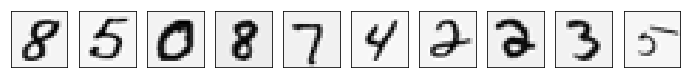

In [33]:
# 现在已经生成了分类器，让我们来预测每个数字吧
sample_idx = np.random.choice(np.arange(data['X'].shape[0]),10)
sample_images = data['X'][sample_idx,:]
y = data['y'][sample_idx,:]
fig,ax_array = plt.subplots(nrows=1,ncols=10,sharex=True,sharey=True,figsize=(12,1.2))
for c in range(10):
    ax_array[c].matshow(np.array(sample_images[c].reshape((20,20))).T,cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    pass
sample_images = np.insert(sample_images,0,values=np.ones(sample_images.shape[0]),axis=1)

In [34]:
numbers = []
for i in range(10):
    temp_hx = []
    # 循环10次计算每个数字最可能的值
    for j in range(10):
        # 预测每种分类器产生的值
        temp_sample = np.matrix(sample_images[i])
        theta = np.matrix(all_theta[j])
        temp_hx += [(sigmoid(temp_sample*theta.T))[0,0]]
    numbers += [((temp_hx.index(max(temp_hx)))+1)%10]
    pass
print(numbers)
    

[8, 5, 0, 8, 7, 4, 2, 2, 3, 5]


In [29]:
def predict_all(X,all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    
    num_labels = all_theta.shape[0]
    
    X = np.insert(X,0,values=np.ones(X.shape[0]),axis=1)
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    
    h = sigmoid(X*all_theta.T)
    
    h_max = np.argmax(h,axis=1)
    h_max += 1
    
    return h_max

In [30]:
y_pred = predict_all(data['X'],all_theta)
print(classification_report(data['y'],y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500
          10       0.97      0.99      0.98       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [39]:
# 神经网络的实现实际上也就是矩阵之间的运算，只不过在神经网络这里，theta不再是一维的，而是一个矩阵
path = 'D:/Google_Download/andrew_ml_ex33507/ex3weights.mat'
weight = loadmat(path)
theta1,theta2 = weight['Theta1'],weight['Theta2']
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [42]:
X2 = data['X']
X2 = np.matrix(np.insert(X2,0,values=np.ones(X2.shape[0]),axis=1))
y2 = np.matrix(data['y'])
X2.shape,y2.shape


((5000, 401), (5000, 1))

In [43]:
a1 = X2
z2 = a1*theta1.T
z2.shape

(5000, 25)

In [45]:
a2 = sigmoid(z2)
a2 = np.insert(a2,0,values=np.ones(a2.shape[0]),axis=1)
a2.shape

(5000, 26)

In [47]:
z3 = a2*theta2.T
a3 = sigmoid(z3)

matrix([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
         4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
        [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
         2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
        [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
         6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
        ...,
        [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
         2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
        [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
         1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
        [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
         5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])

In [51]:
y_predict = (np.argmax(a3,axis=1)+1) # %10
y_predict

matrix([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=int64)

In [52]:
print(classification_report(data['y'],y_predict))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

